In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
#importing neccessary libraries 

In [154]:
df=pd.read_csv("/home/user/Downloads/cowid-covid-data.csv") #data loading 
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [155]:
df.describe(include='all') #data structure

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,346527,330066,346527,346527,3.086720e+05,3.370280e+05,3.357690e+05,2.871690e+05,337072.000000,335842.000000,...,198809.000000,131621.000000,237197.000000,318798.000000,260442.000000,3.465270e+05,1.195300e+04,11953.000000,11953.000000,11953.000000
unique,255,6,255,1374,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1374,78148,1374,255,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.609069e+06,9.695906e+03,9.732069e+03,8.559525e+04,86.392889,86.704207,...,32.909773,50.789423,3.097041,73.713912,0.722451,1.282011e+08,5.113535e+04,9.739424,11.461129,1646.844959
std,NaN,NaN,NaN,NaN,4.032547e+07,1.108324e+05,9.495414e+04,4.380493e+05,616.815791,561.926045,...,13.574467,31.956983,2.548371,7.395696,0.148980,6.598993e+08,1.442796e+05,12.380781,25.354695,1929.159161
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,NaN,NaN,NaN,NaN,7.988750e+03,0.000000e+00,2.860000e-01,1.250000e+02,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.066000e+02,1.320000,-1.620000,65.345720
50%,NaN,NaN,NaN,NaN,6.904700e+04,2.000000e+00,2.585700e+01,1.313000e+03,0.000000,0.143000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.736601e+03,8.070000,5.770000,1072.472700
75%,NaN,NaN,NaN,NaN,7.345502e+05,2.730000e+02,5.107140e+02,1.181800e+04,3.000000,5.286000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.668959e+04,15.470000,16.520000,2704.933800


In [156]:
#deleting unwanted columns 
df.drop(['new_cases_smoothed','new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True) 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [157]:
#rename cols 
df.rename(columns={'date':'Date','location':'Country','continent':'Continent','iso_code':'ISO_Code'},inplace=True)
df.head()

,ISO_Code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [158]:
# Listin continent names
continent=list(df.Continent.unique())
print(continent)

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']


In [159]:
# Simple imputer helps with missing values in a dataset.
# In the below code, a simple imputer will replace a missing value with a constant value.
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [160]:
#The groupby command allows us to divide our data into different groups and perform our data analysis
df3=df2.groupby(['Date','Country'])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
print(df3)

              Date              Country    total_cases   total_deaths  \
0       2020-01-01            Argentina  missing_value  missing_value   
1       2020-01-01               Mexico  missing_value  missing_value   
2       2020-01-02            Argentina  missing_value  missing_value   
3       2020-01-02               Mexico  missing_value  missing_value   
4       2020-01-03          Afghanistan  missing_value  missing_value   
...            ...                  ...            ...            ...   
346522  2023-10-05        North America  missing_value  missing_value   
346523  2023-10-05        South America  missing_value  missing_value   
346524  2023-10-05  Upper middle income  missing_value  missing_value   
346525  2023-10-05              Uruguay  missing_value  missing_value   
346526  2023-10-05                World  missing_value  missing_value   

       total_vaccinations  
0           missing_value  
1           missing_value  
2           missing_value  
3          

In [161]:
df3['total_cases'].replace({'missing_value':0},inplace=True)
df3['total_deaths'].replace({'missing_value':0},inplace=True)
df3['total_vaccinations'].replace({'missing_value':0},inplace=True)
print(df3)

              Date              Country  total_cases  total_deaths  \
0       2020-01-01            Argentina          0.0           0.0   
1       2020-01-01               Mexico          0.0           0.0   
2       2020-01-02            Argentina          0.0           0.0   
3       2020-01-02               Mexico          0.0           0.0   
4       2020-01-03          Afghanistan          0.0           0.0   
...            ...                  ...          ...           ...   
346522  2023-10-05        North America          0.0           0.0   
346523  2023-10-05        South America          0.0           0.0   
346524  2023-10-05  Upper middle income          0.0           0.0   
346525  2023-10-05              Uruguay          0.0           0.0   
346526  2023-10-05                World          0.0           0.0   

        total_vaccinations  
0             0.000000e+00  
1             0.000000e+00  
2             0.000000e+00  
3             0.000000e+00  
4             

In [162]:
df4=df3[df3['total_deaths']>1000000]
countries=df4['Country'].unique()
len(countries)

10

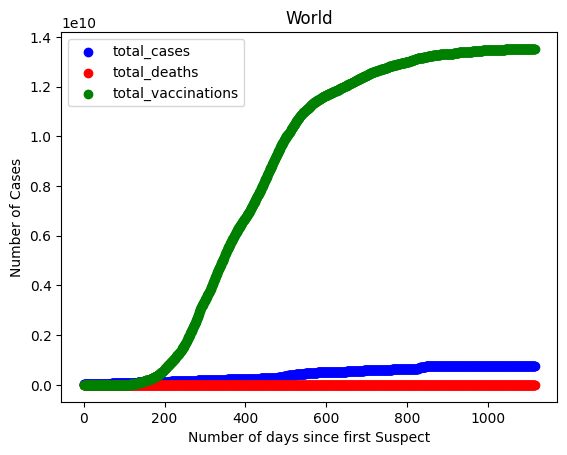

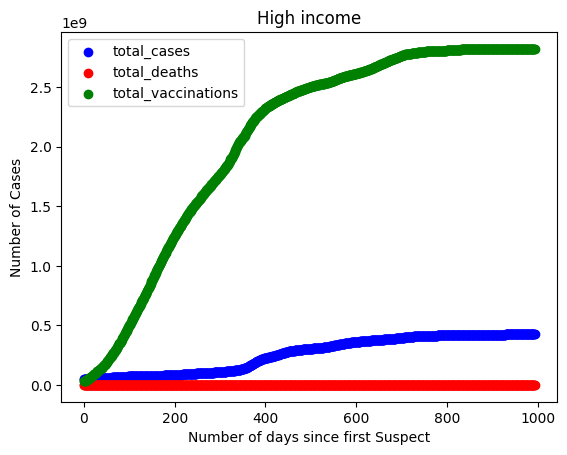

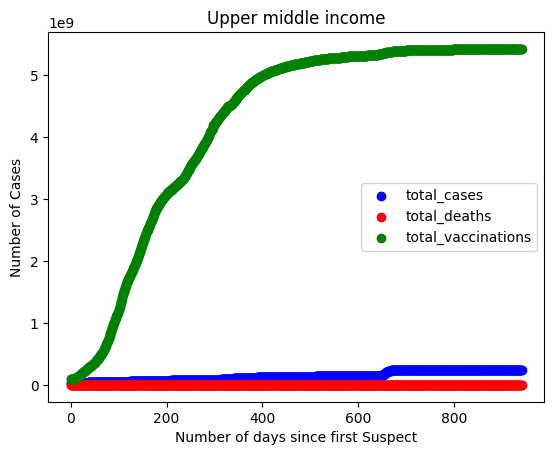

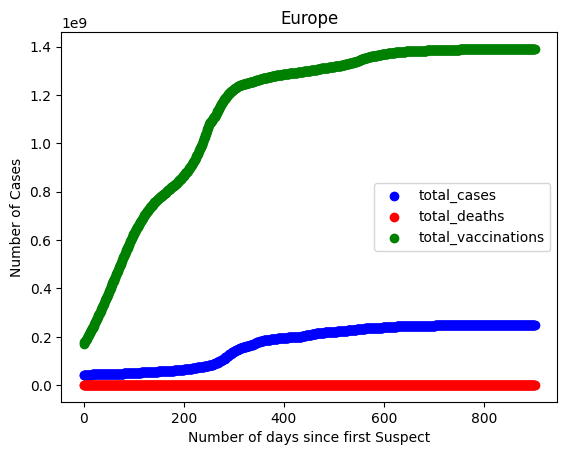

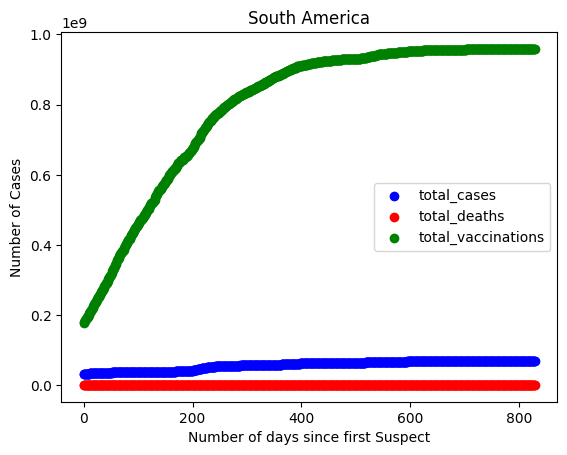

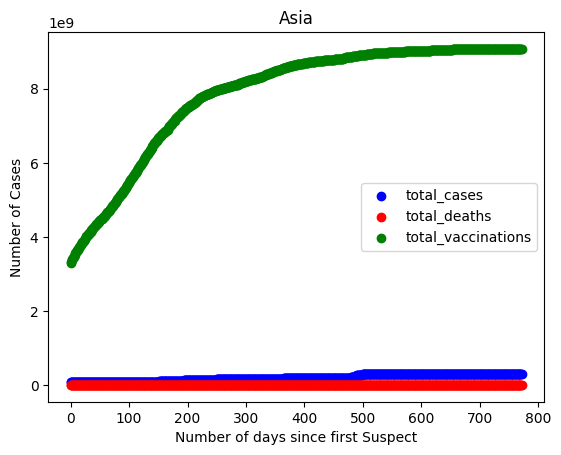

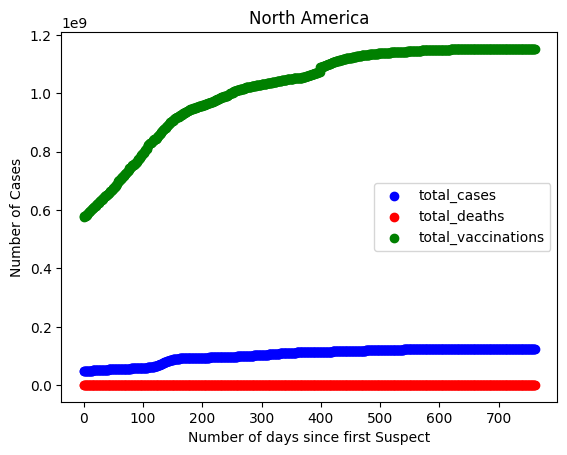

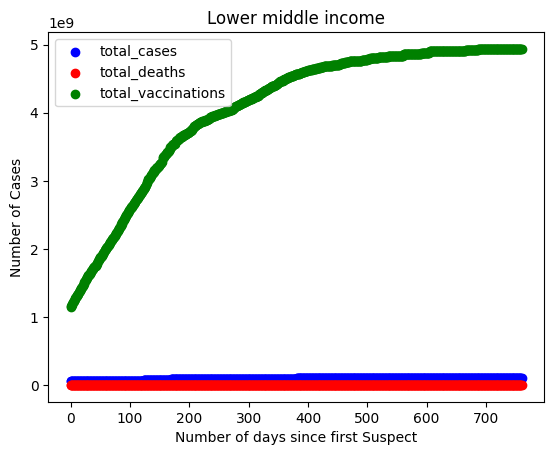

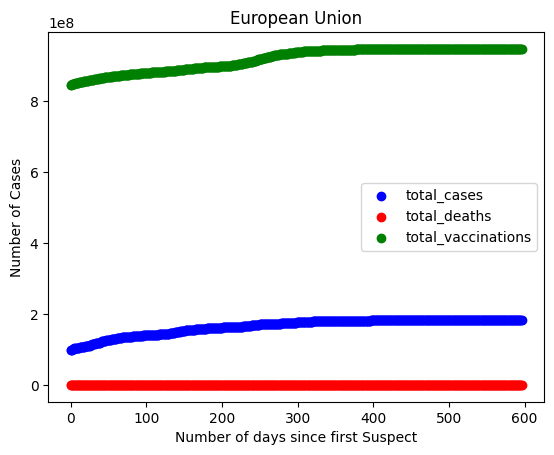

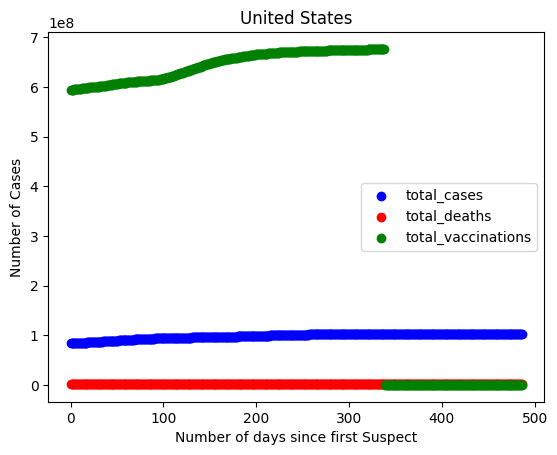

In [163]:
#We will show the trend of total_cases, total_deaths, total_vaccinations of these 8 countries using a scatter plot. 
#We will use a for loop to get all those 8 countries' graphs.
for i in range(0,len(countries)):
    a=df4[df4['Country']==countries[i]]
    plt.scatter(np.arange(0,len(a)),a['total_cases'],color='blue',label='total_cases')
    plt.scatter(np.arange(0,len(a)),a['total_deaths'],color='red',label='total_deaths')
    plt.scatter(np.arange(0,len(a)),a['total_vaccinations'],color='green',label='total_vaccinations')
    plt.title(countries[i])
    plt.xlabel("Number of days since first Suspect")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

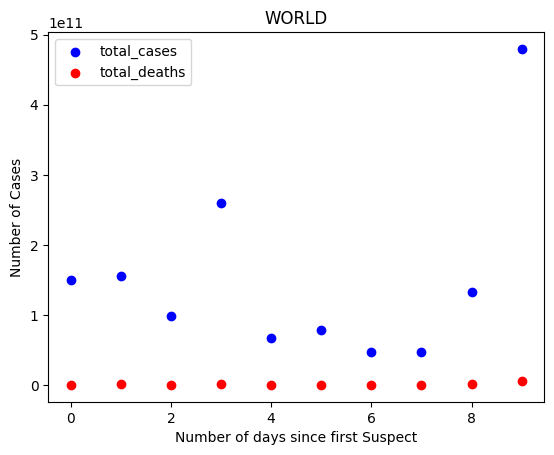

In [164]:
#analysis by country 
df5=df4.groupby(['Country'])[['total_cases','total_deaths']].sum().reset_index()
b=df5
plt.scatter(np.arange(0,len(b)),b['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(b)),b['total_deaths'],color='red',label='total_deaths')
plt.title("WORLD")
plt.xlabel("Number of days since first Suspect")
plt.ylabel("Number of Cases")
plt.legend()
plt.show

In [165]:
date=df4['Date'].unique()
len(date)

1118

<function matplotlib.pyplot.show(close=None, block=None)>

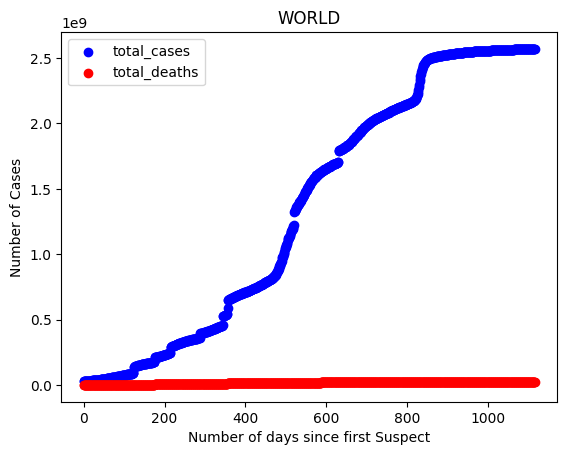

In [166]:
df6=df4.groupby(['Date'])[['total_cases','total_deaths']].sum().reset_index()
c=df6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title("WORLD")
plt.xlabel("Number of days since first Suspect")
plt.ylabel("Number of Cases")
plt.legend()
plt.show